In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('..//DATA/rock_density_xray.csv')

In [4]:
df.head()

,Rebound Signal Strength nHz,Rock Density kg/m3
0,72.945124,2.456548
1,14.229877,2.601719
2,36.597334,1.967004
3,9.578899,2.300439
4,21.765897,2.452374


In [5]:
df.columns = ['signal', 'density']

<AxesSubplot:xlabel='signal', ylabel='density'>

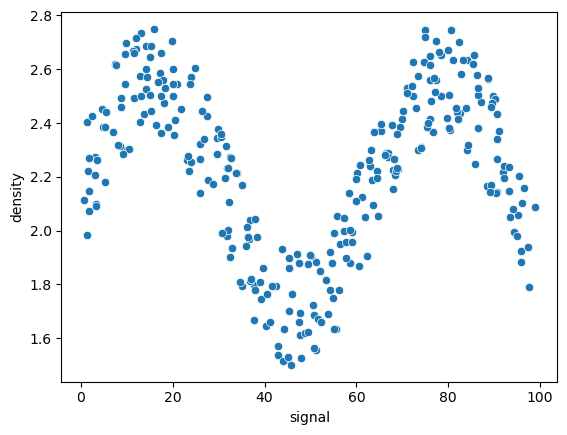

In [6]:
sns.scatterplot(x = 'signal', y = 'density', data = df)

In [8]:
X = df['signal'].values.reshape(-1,1)
y = df['density']

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

In [11]:
from sklearn.linear_model import LinearRegression

In [14]:
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

LinearRegression()

In [15]:
lr_pred = linear_model.predict(X_test)

In [16]:
lr_pred

array([2.22029657, 2.22047771, 2.22035637, 2.22034337, 2.22039737,
       2.22050555, 2.22042659, 2.22028877, 2.22034673, 2.22029714,
       2.22041506, 2.22050153, 2.22043891, 2.22042003, 2.22047022,
       2.22032403, 2.22033377, 2.22030628, 2.22035154, 2.22035373,
       2.22029266, 2.22036798, 2.22033018, 2.22030611, 2.22042754,
       2.22044019, 2.2204142 , 2.22040303, 2.22048946, 2.22047495])

In [17]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [18]:
mean_absolute_error(y_test,lr_pred)

0.211198973318633

In [19]:
np.sqrt(mean_squared_error(y_test,lr_pred))

0.25700519965846297

In [20]:
signal_range = np.arange(0,100)
signal_pred = linear_model.predict(signal_range.reshape(-1,1))

<AxesSubplot:xlabel='signal', ylabel='density'>

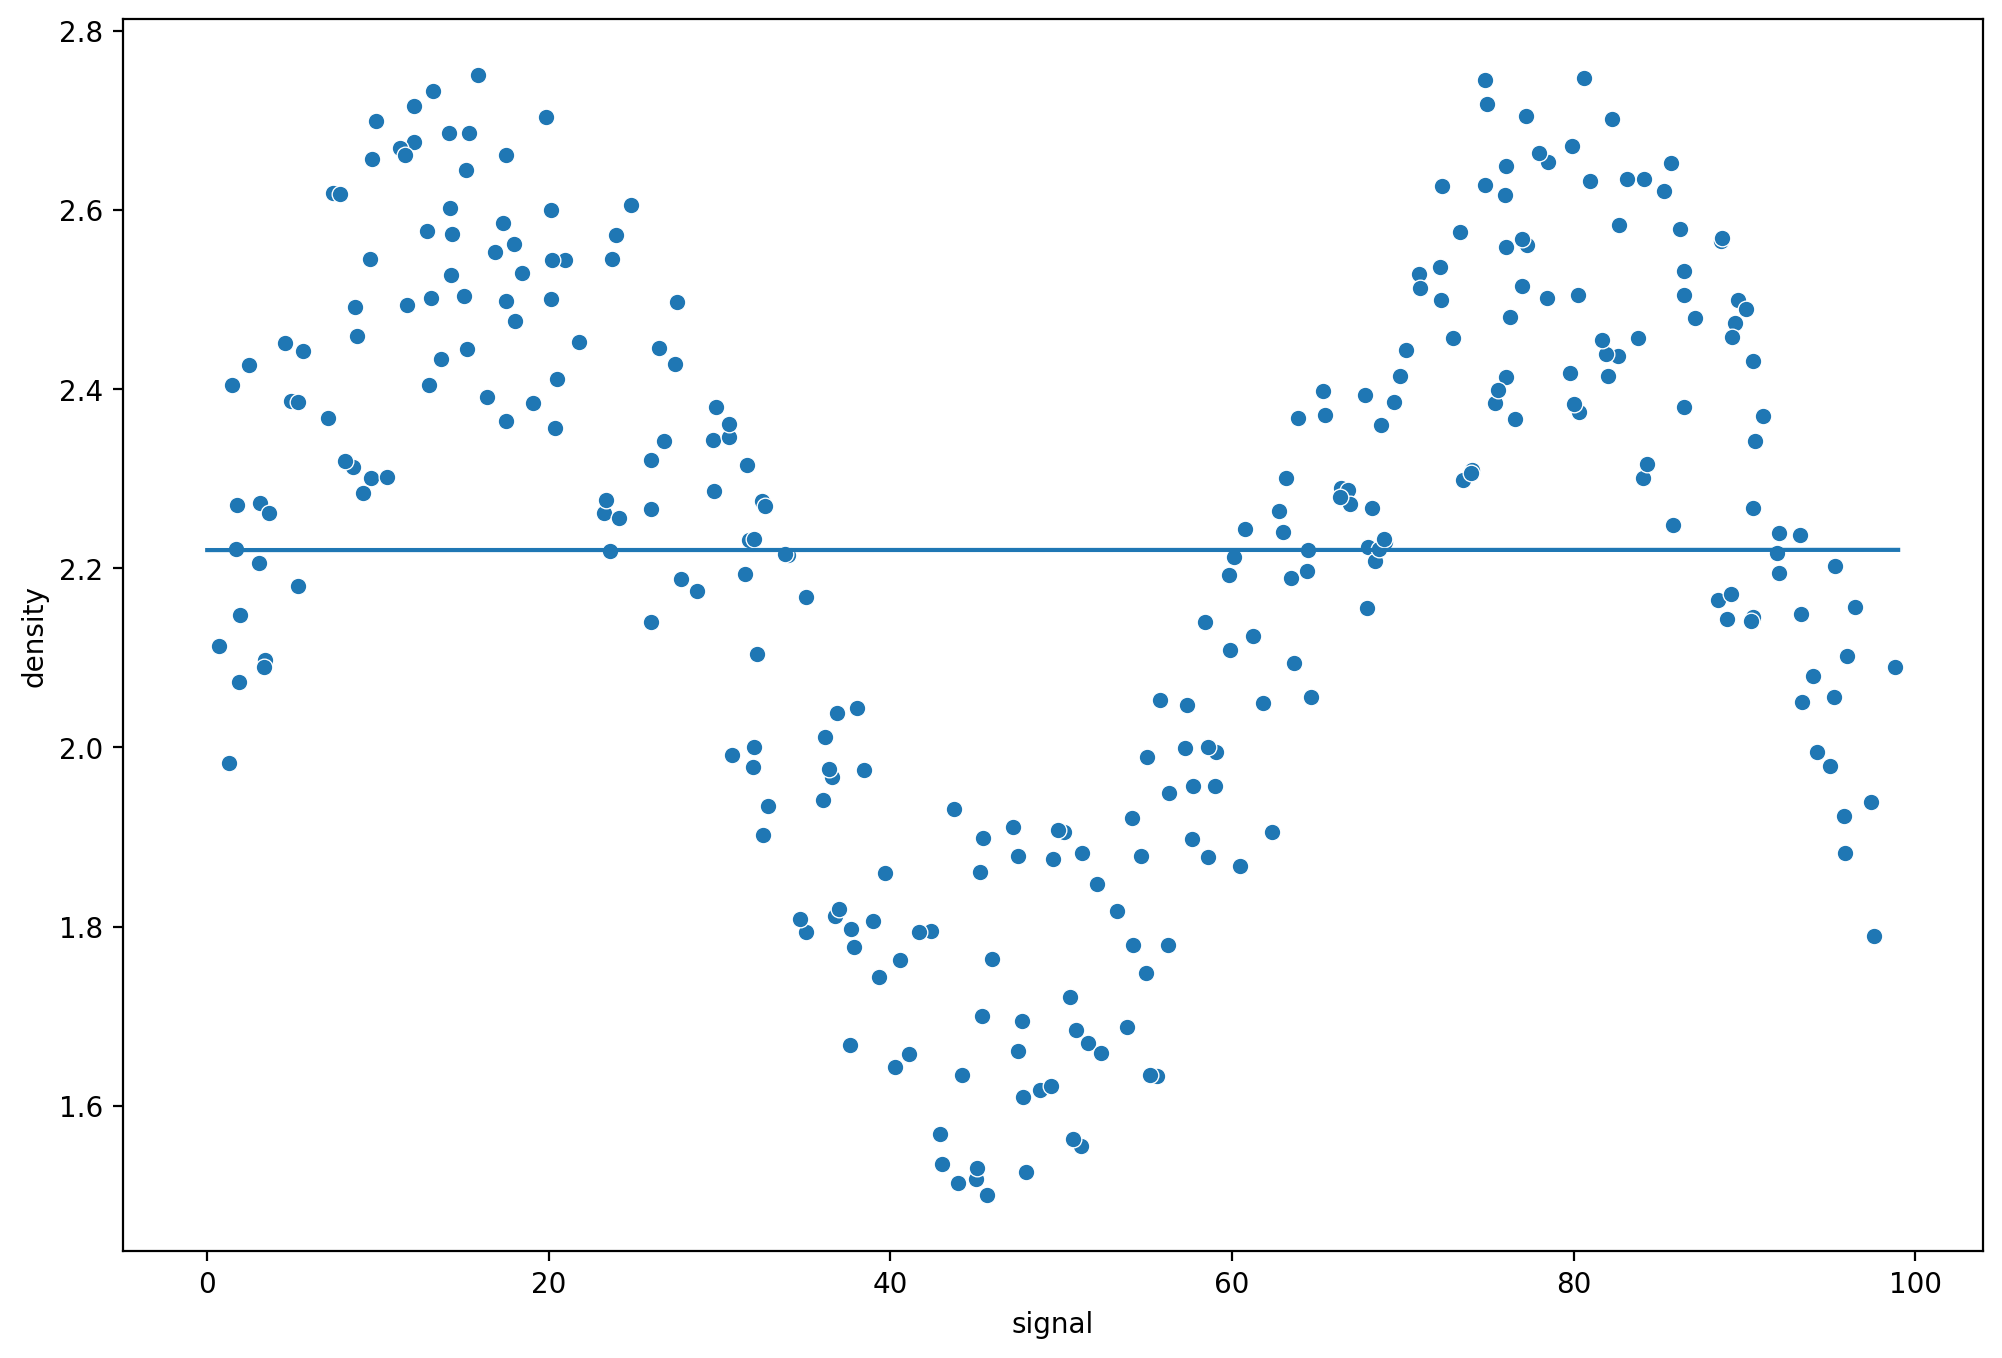

In [21]:
plt.figure(figsize=(12,8), dpi = 200)
plt.plot(signal_range, signal_pred)
sns.scatterplot(x = 'signal', y = 'density', data = df)

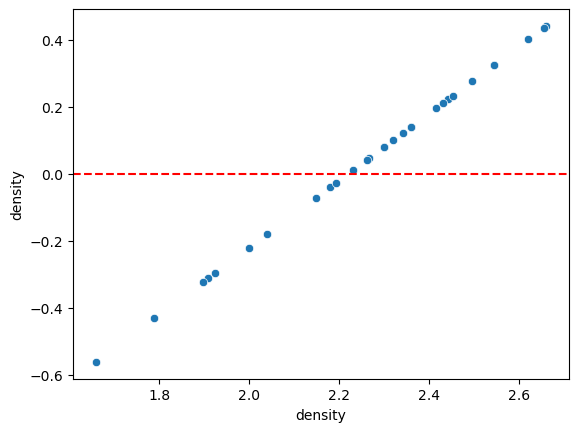

In [24]:
test_residuals = y_test - lr_pred
sns.scatterplot(x = y_test, y = test_residuals)
plt.axhline(y = 0, color = 'red', ls = '--')

In [40]:
def run_model(model, X_train,y_train,X_test,y_test):
    # model fitting
    model.fit(X_train,y_train)
    #calculation metrics
    preds = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test,preds))
    mae = mean_absolute_error(y_test,preds)
    print(f'RMSE: {rmse}\n MSE: {mae}')
    #drawing chart
    signal_range = np.arange(0,100)
    signal_pred = model.predict(signal_range.reshape(-1,1))
    plt.figure(figsize=(12,8), dpi = 200)
    plt.plot(signal_range, signal_pred)
    sns.scatterplot(x = 'signal', y = 'density', data = df, color = 'black')

RMSE: 0.25700519965846297
 MSE: 0.211198973318633


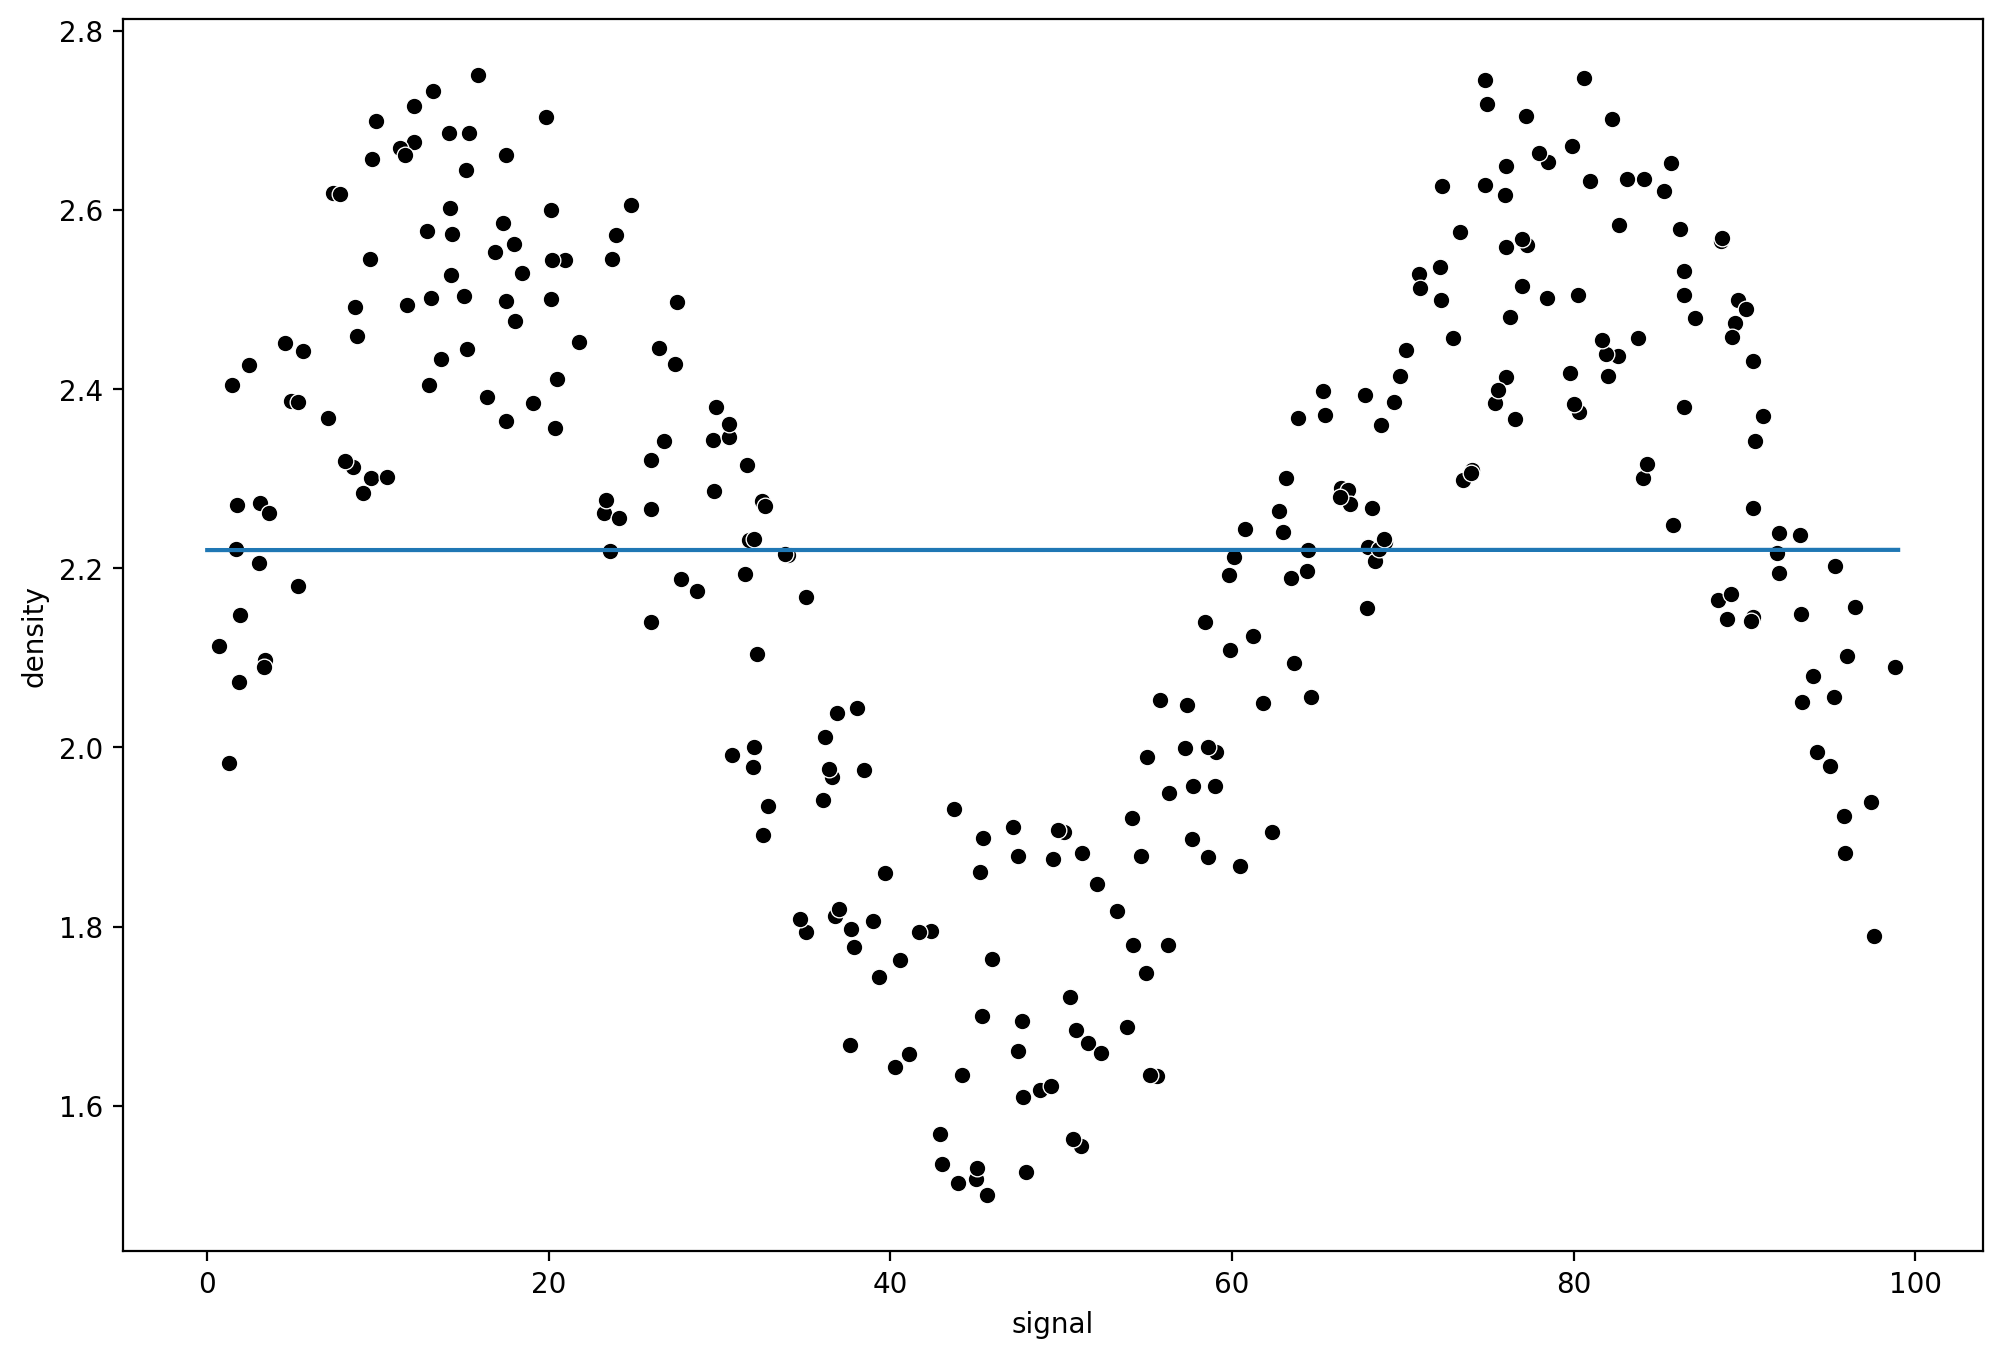

In [32]:
run_model(linear_model,X_train,y_train,X_test,y_test)

In [28]:
from sklearn.pipeline import make_pipeline

RMSE: 0.14452813064745804
 MSE: 0.11864311989943195


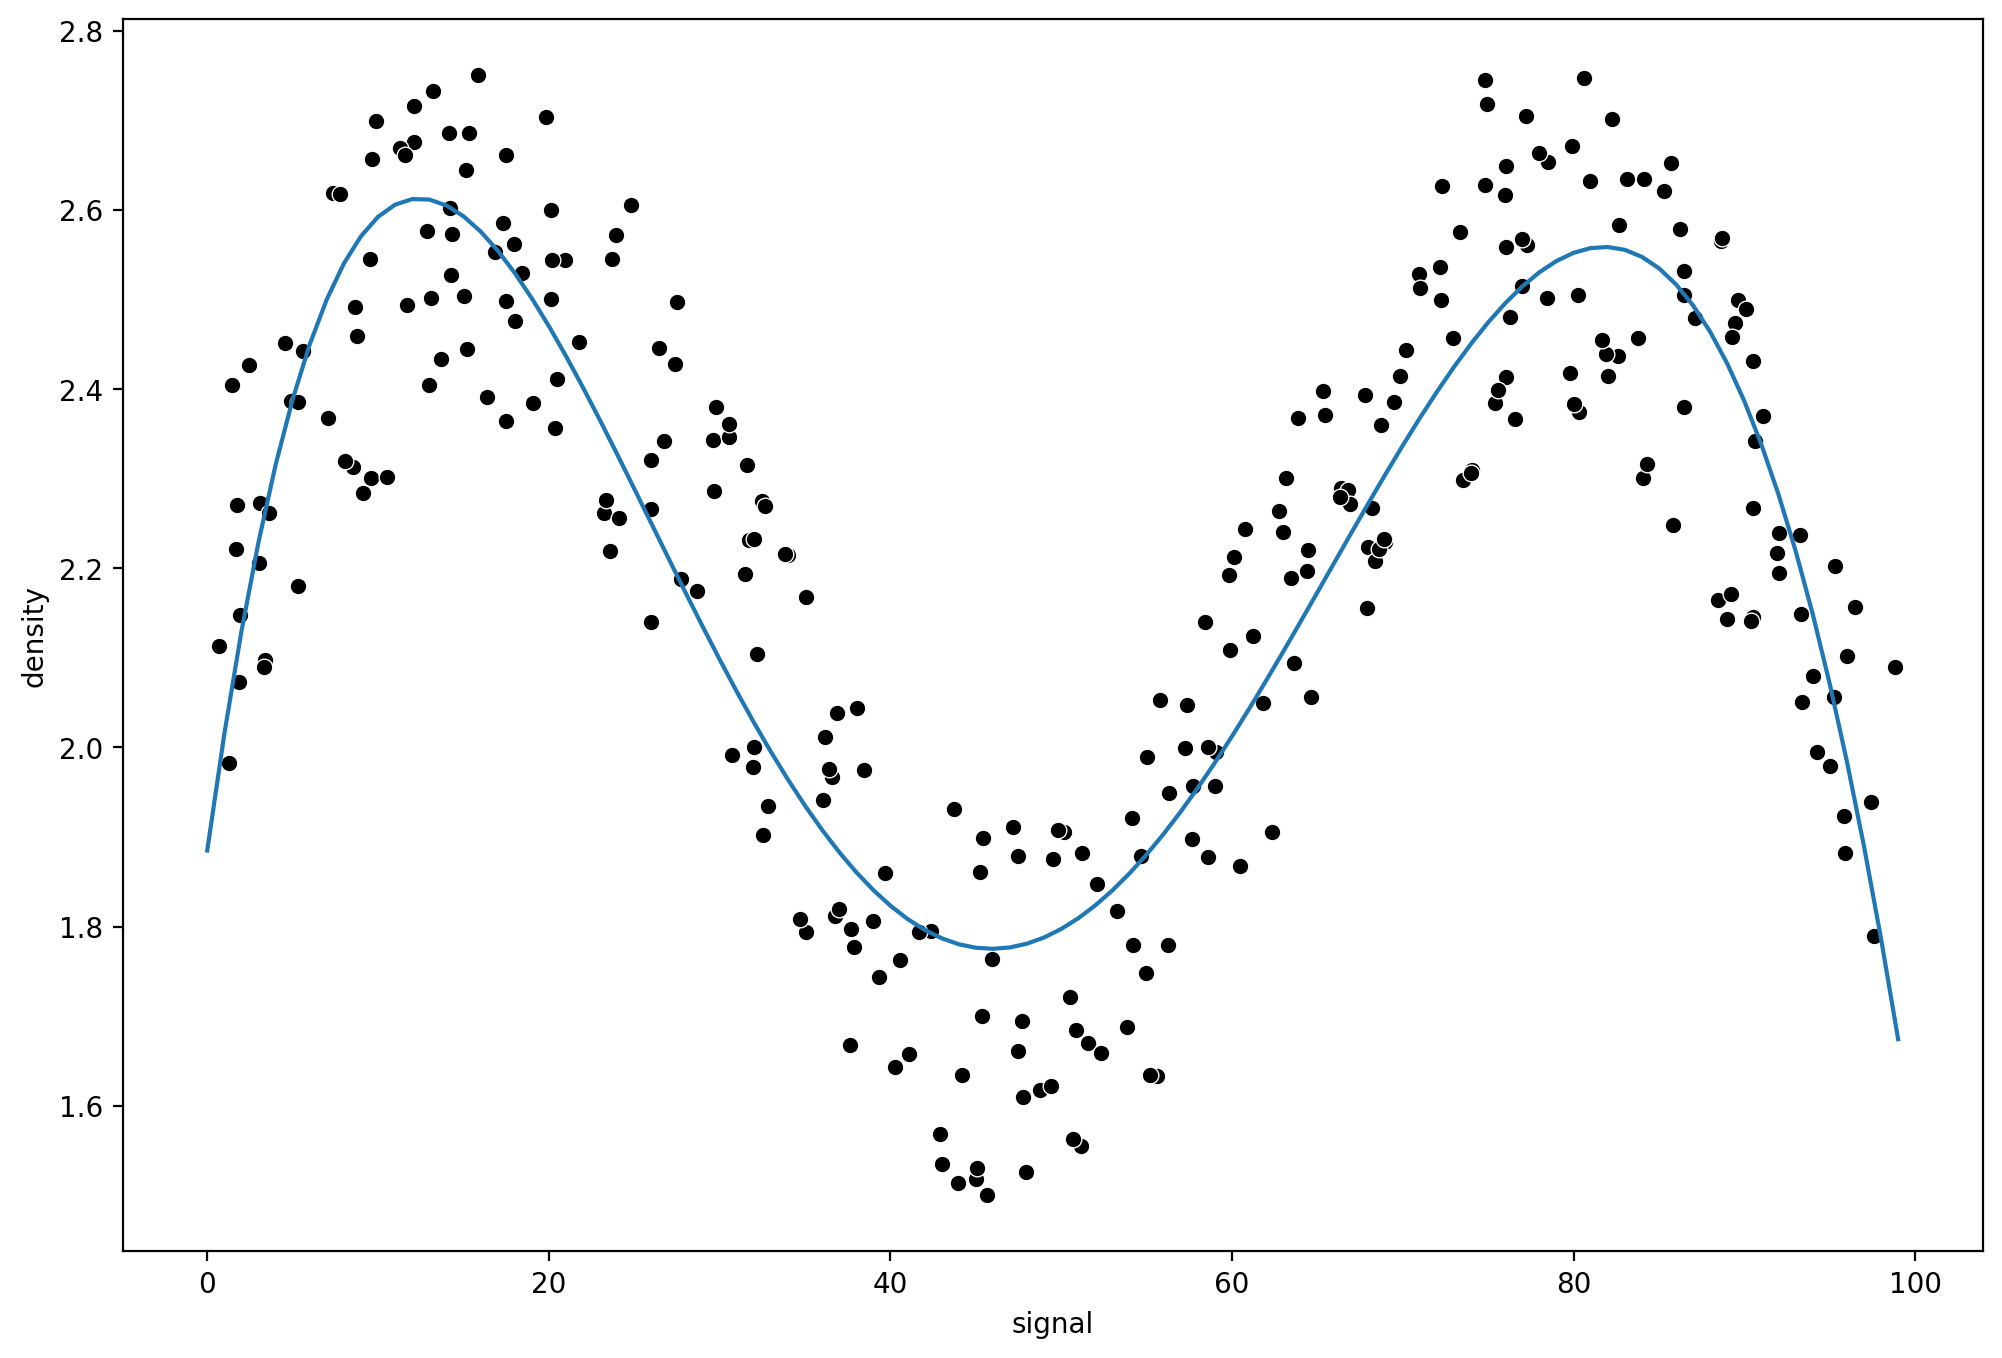

In [45]:
from sklearn.preprocessing import PolynomialFeatures
pipe = make_pipeline(PolynomialFeatures(degree = 5),LinearRegression())
run_model(pipe,X_train,y_train,X_test,y_test)

RMSE: 0.15234870286353372
 MSE: 0.11877297474442382
RMSE: 0.13730685016923655
 MSE: 0.12198383614100564
RMSE: 0.13277855732740926
 MSE: 0.11635971693292672
RMSE: 0.13351482702752904
 MSE: 0.11561598074223126


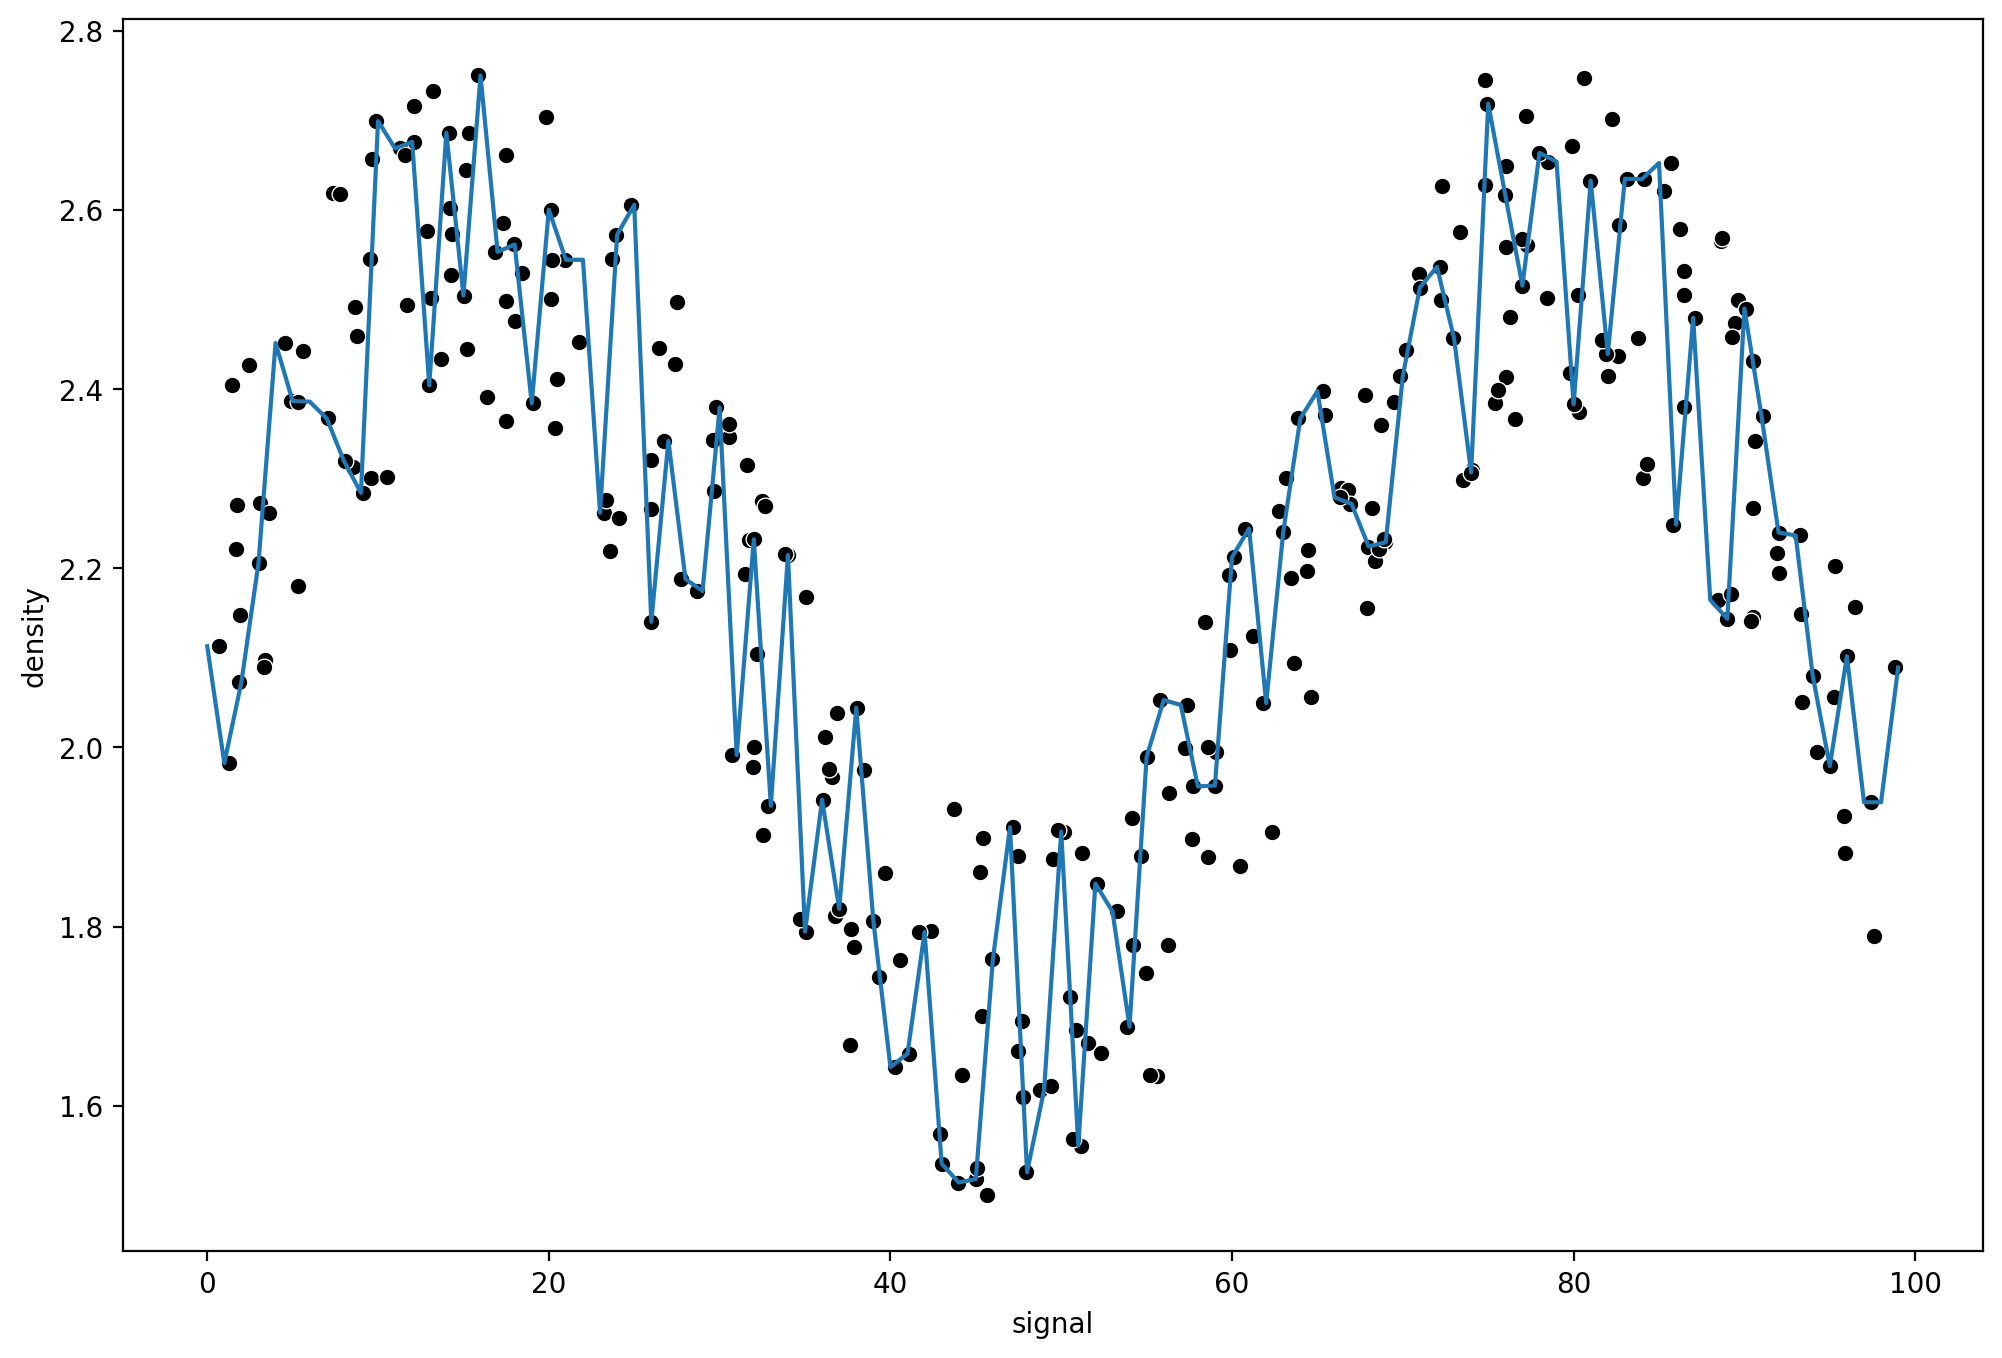

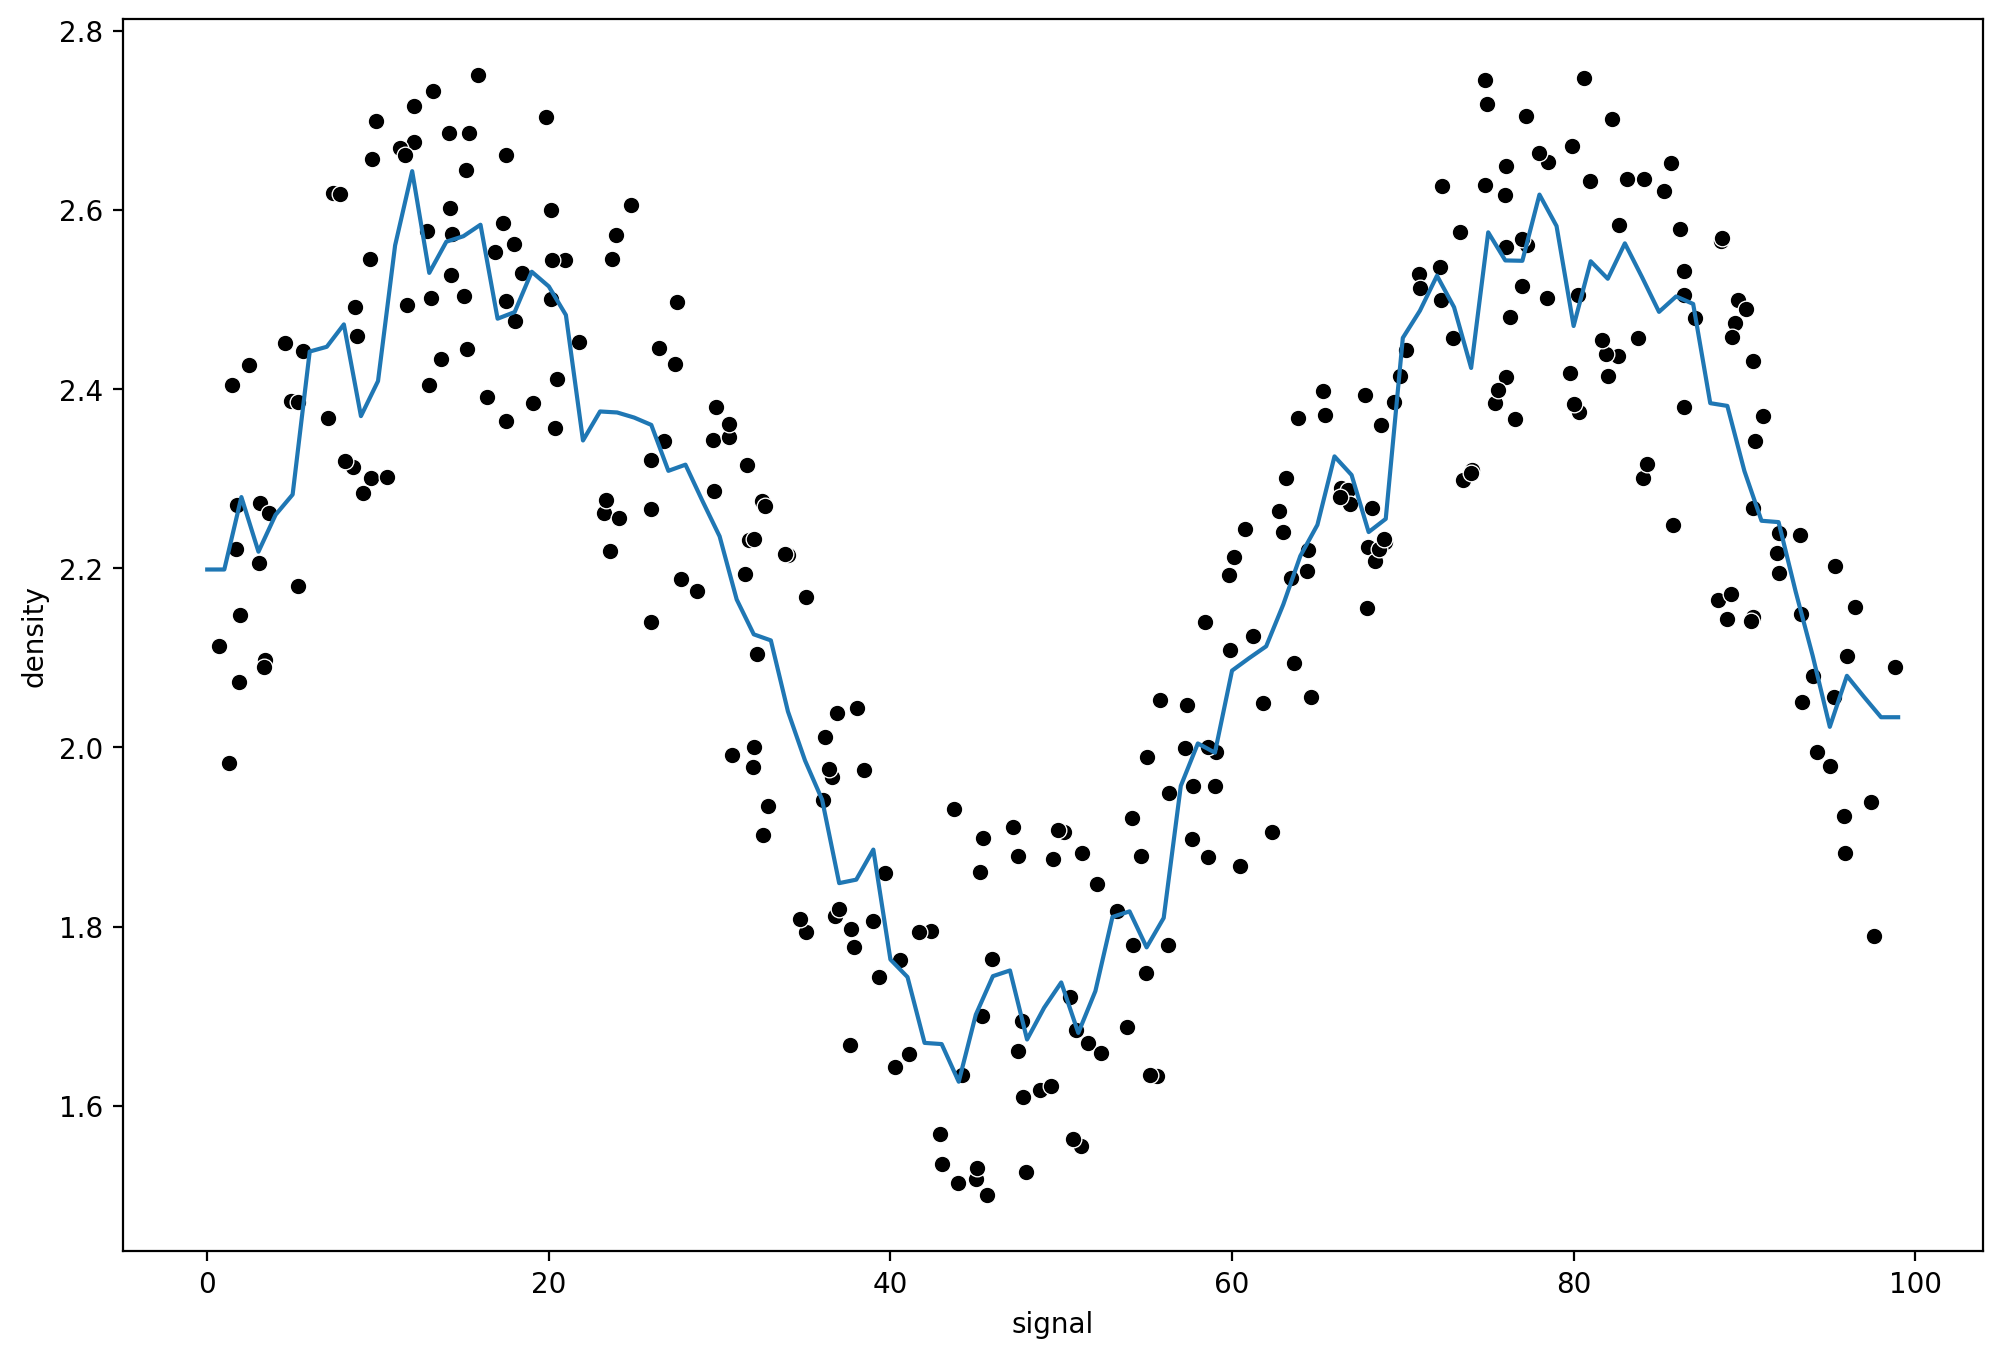

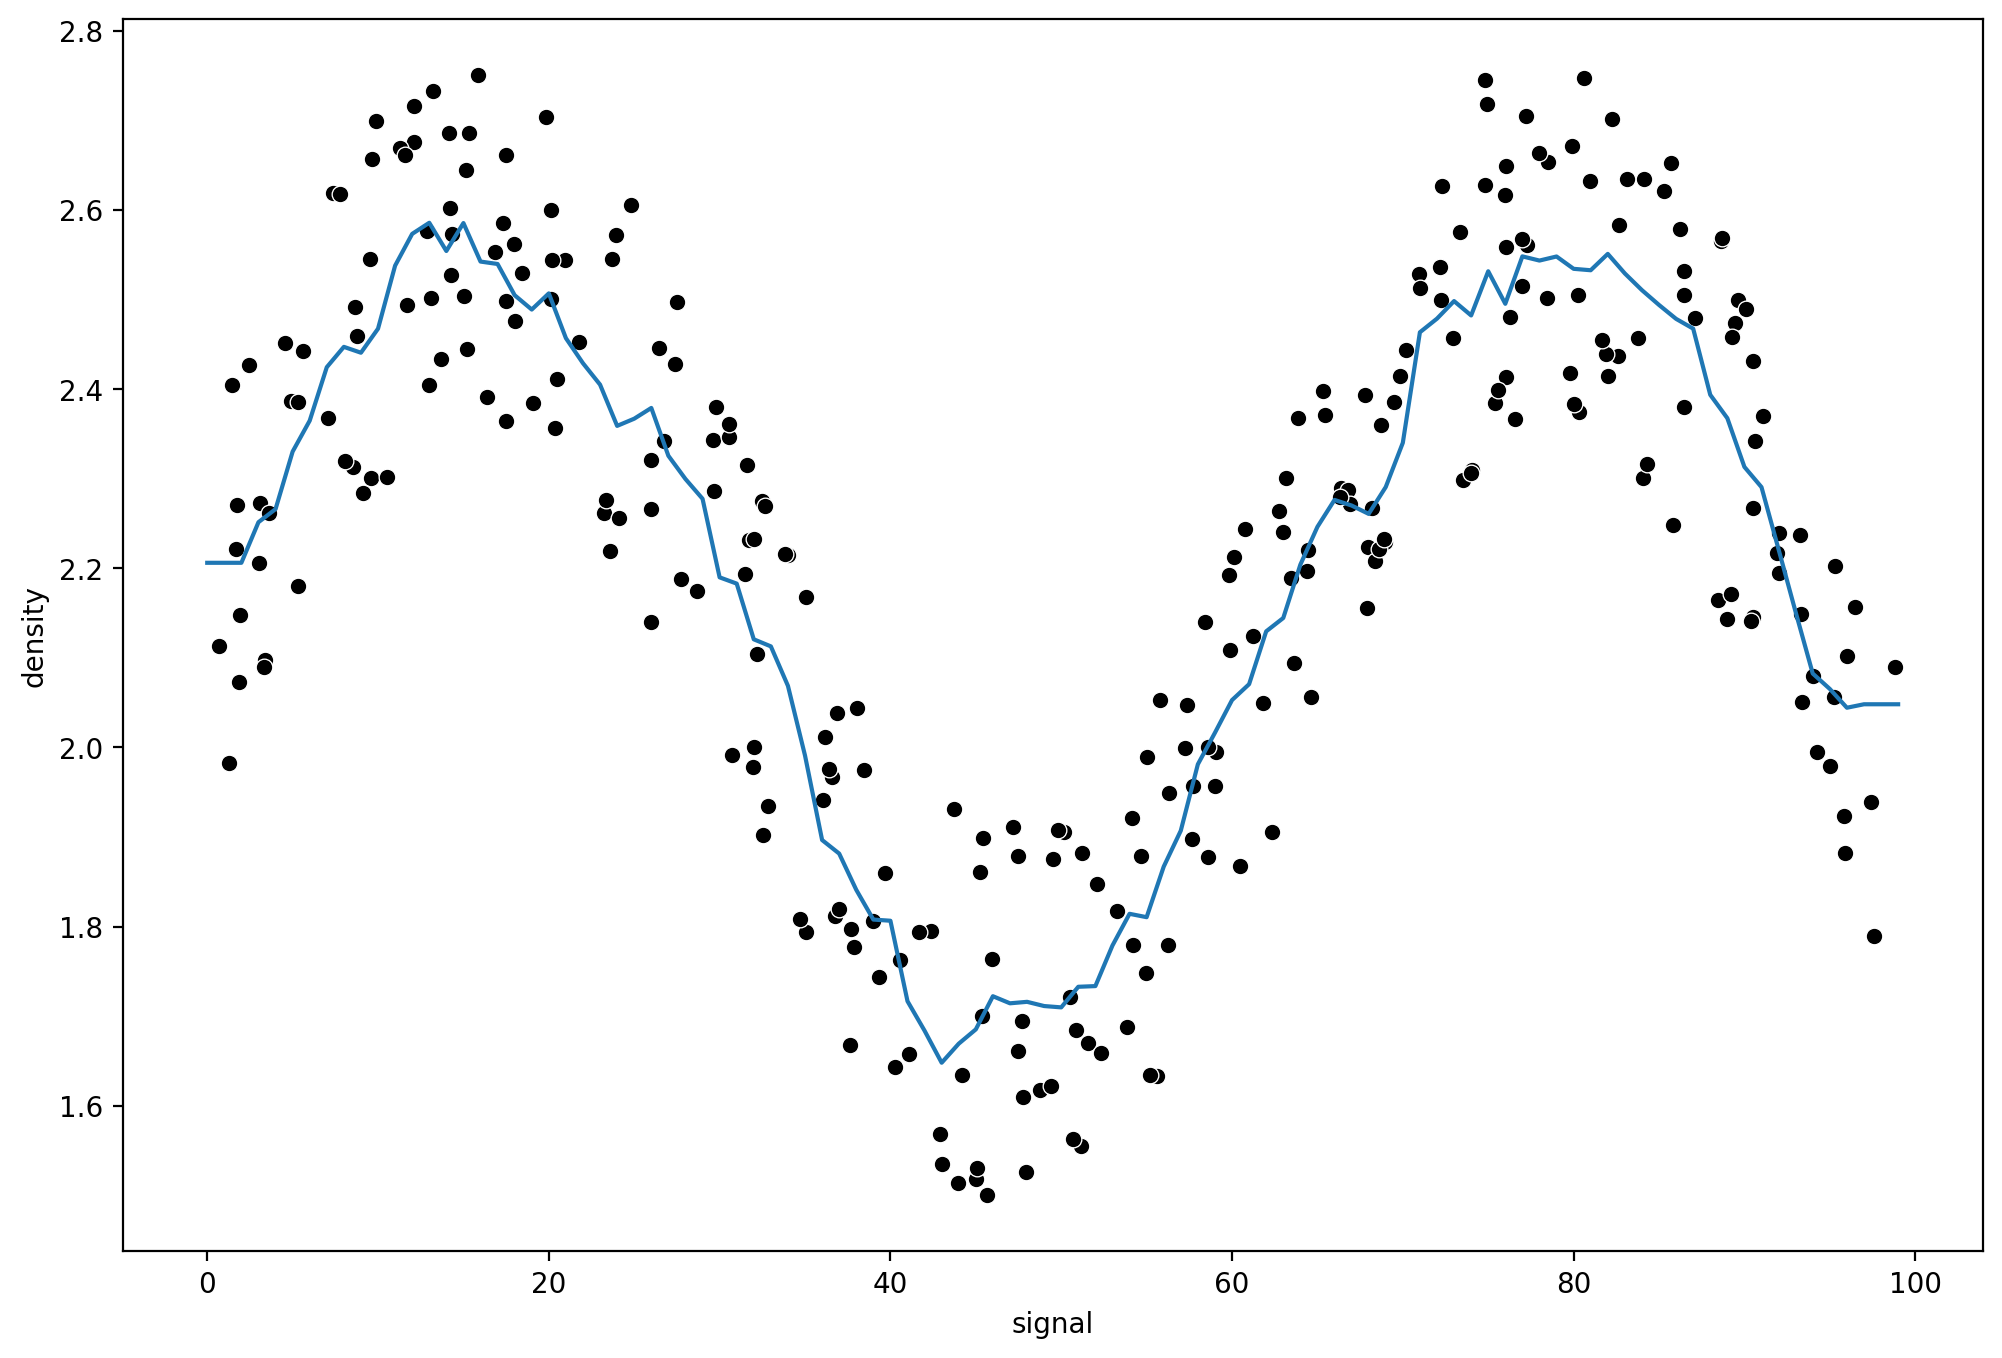

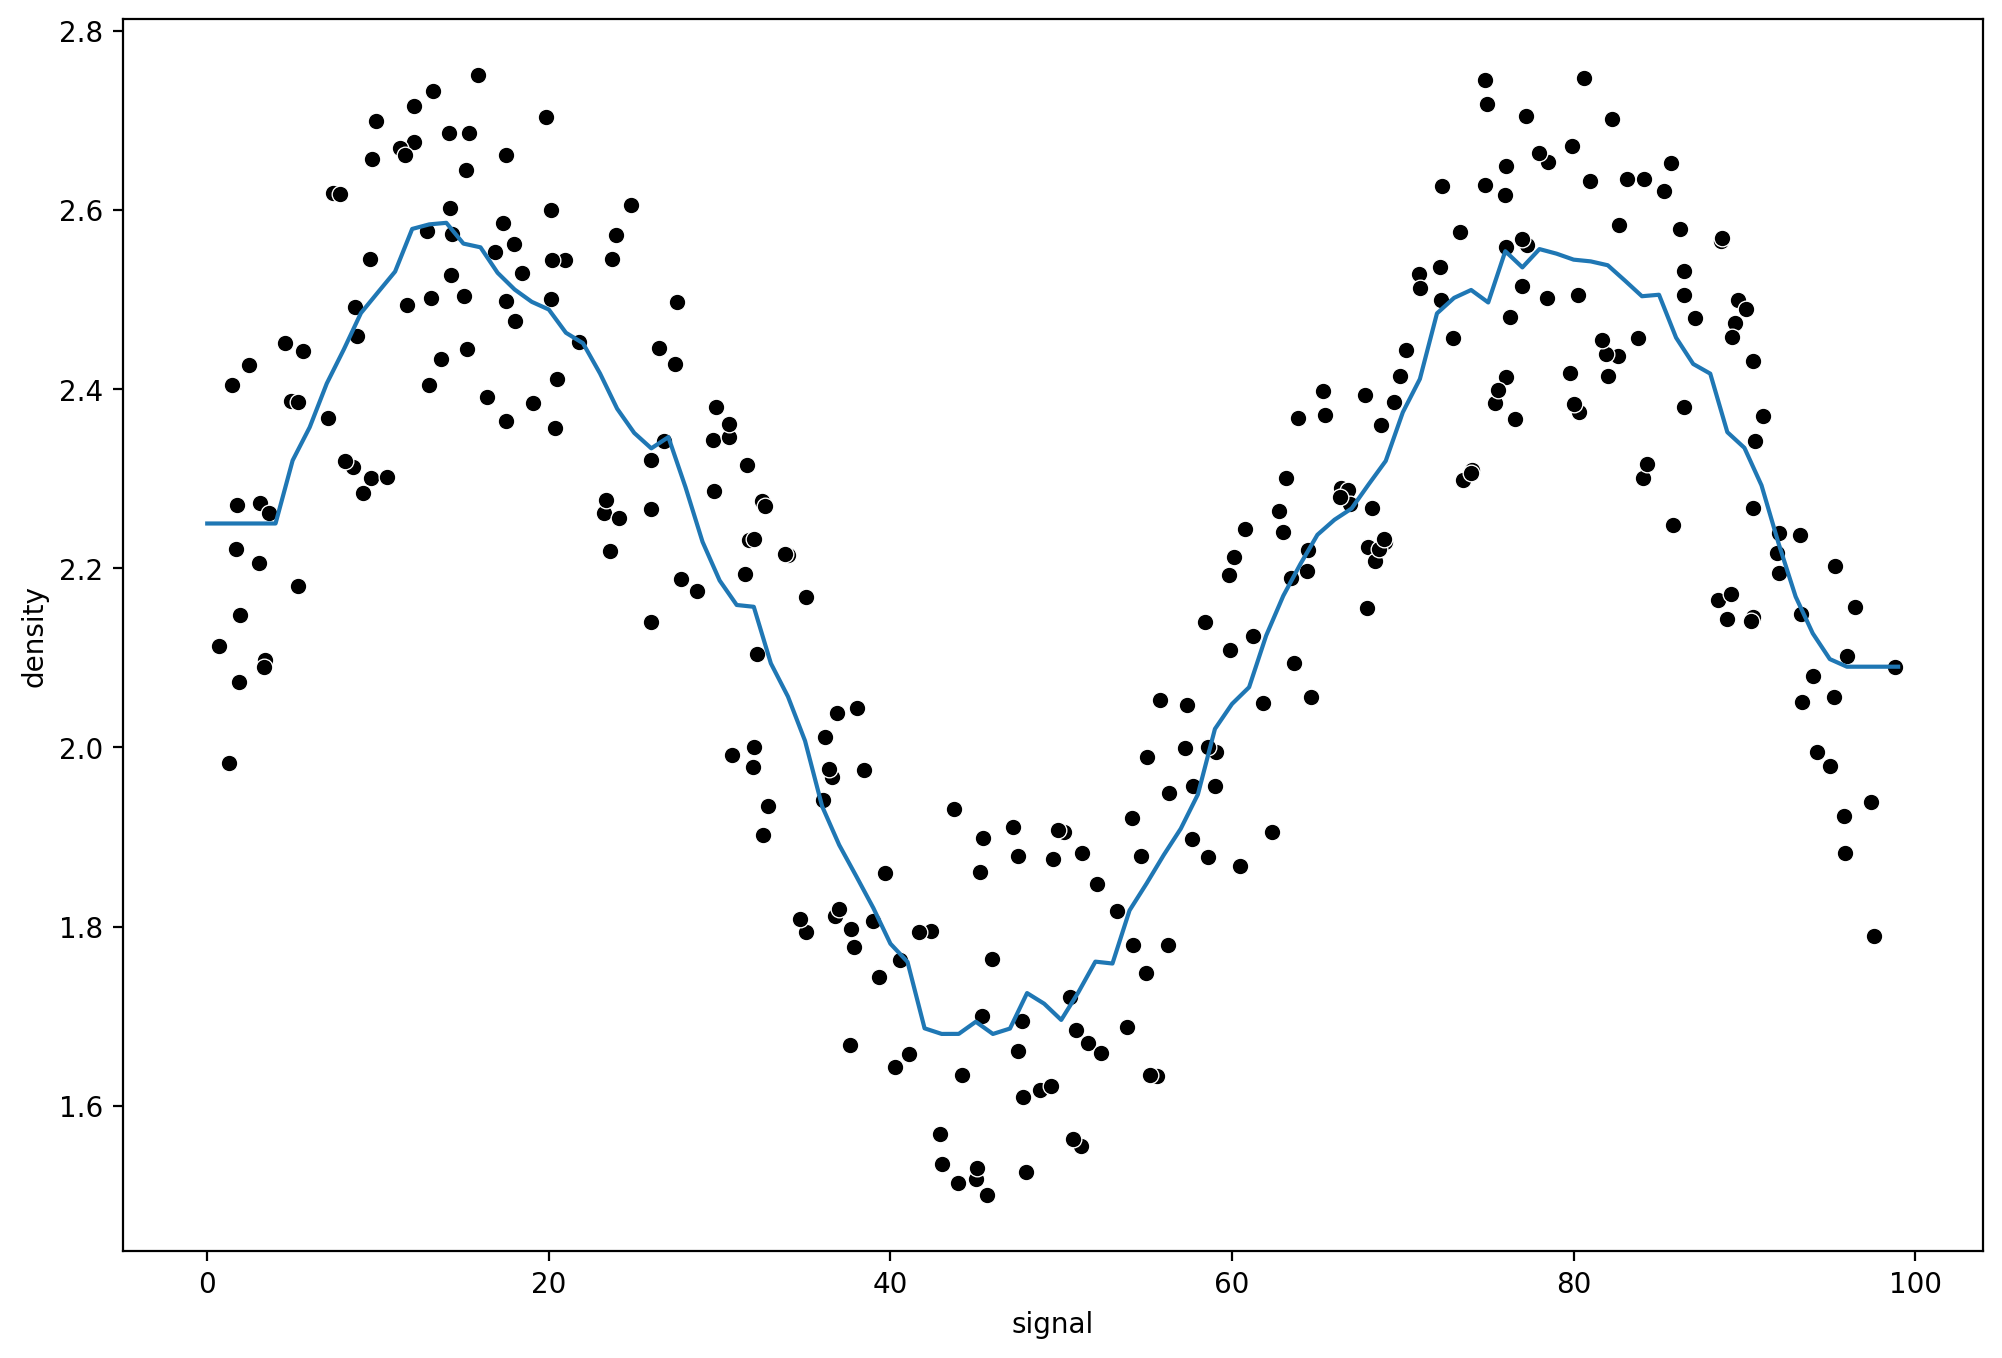

In [46]:
from sklearn.neighbors import KNeighborsRegressor
k_values = [1,5,10,15]
for n in k_values:
    model = KNeighborsRegressor(n_neighbors=n)
    run_model(model,X_train,y_train,X_test,y_test)
    

RMSE: 0.15234870286353372
 MSE: 0.11877297474442382


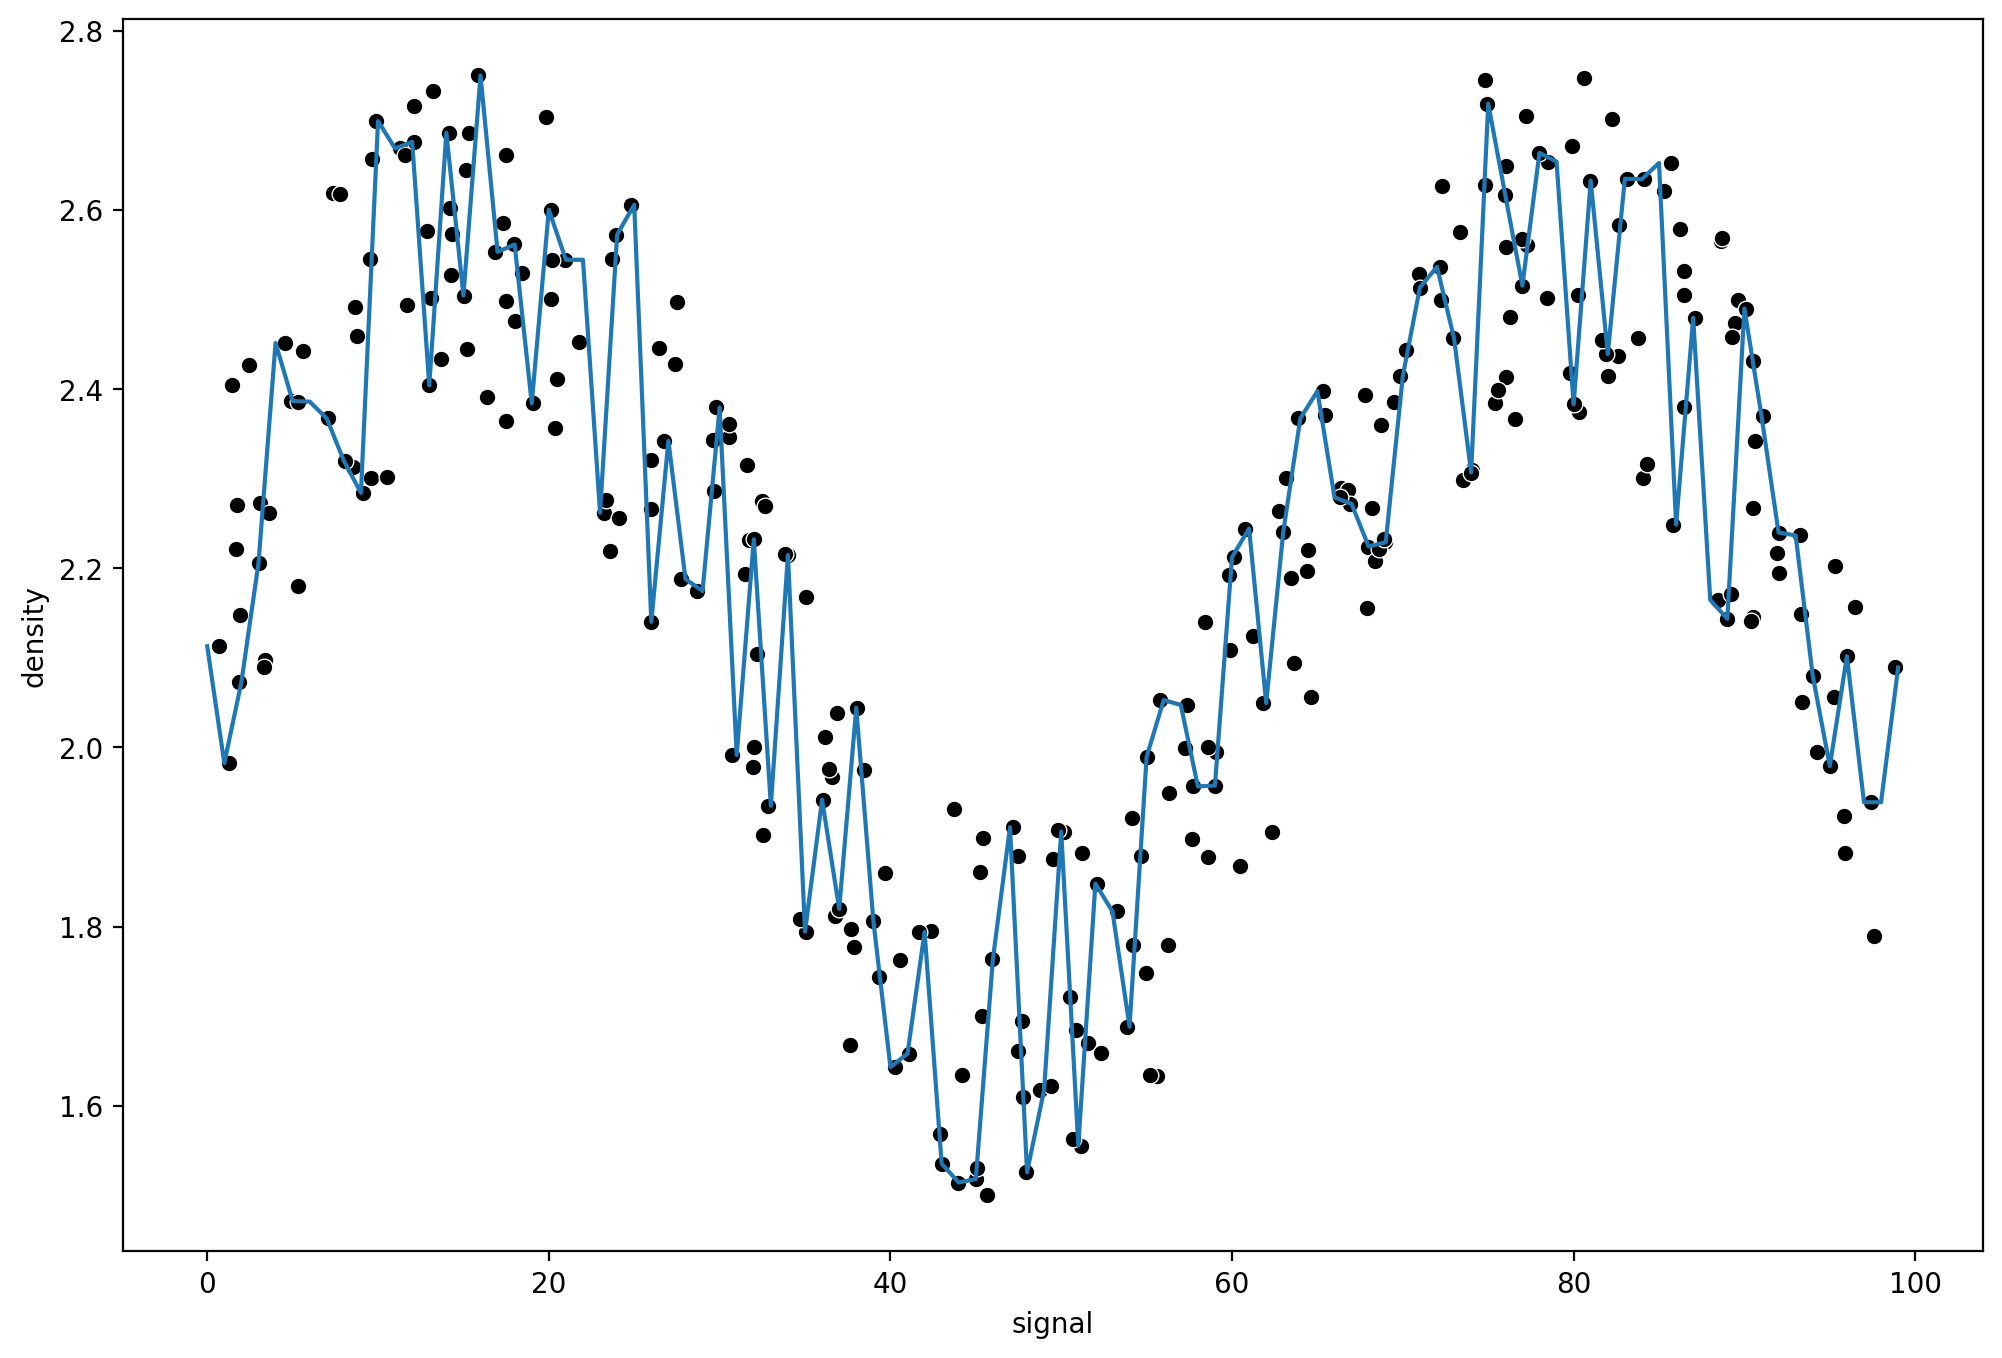

In [47]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor()
run_model(model,X_train,y_train,X_test,y_test)

In [48]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV

RMSE: 0.13015742723602505
 MSE: 0.11243103141069175


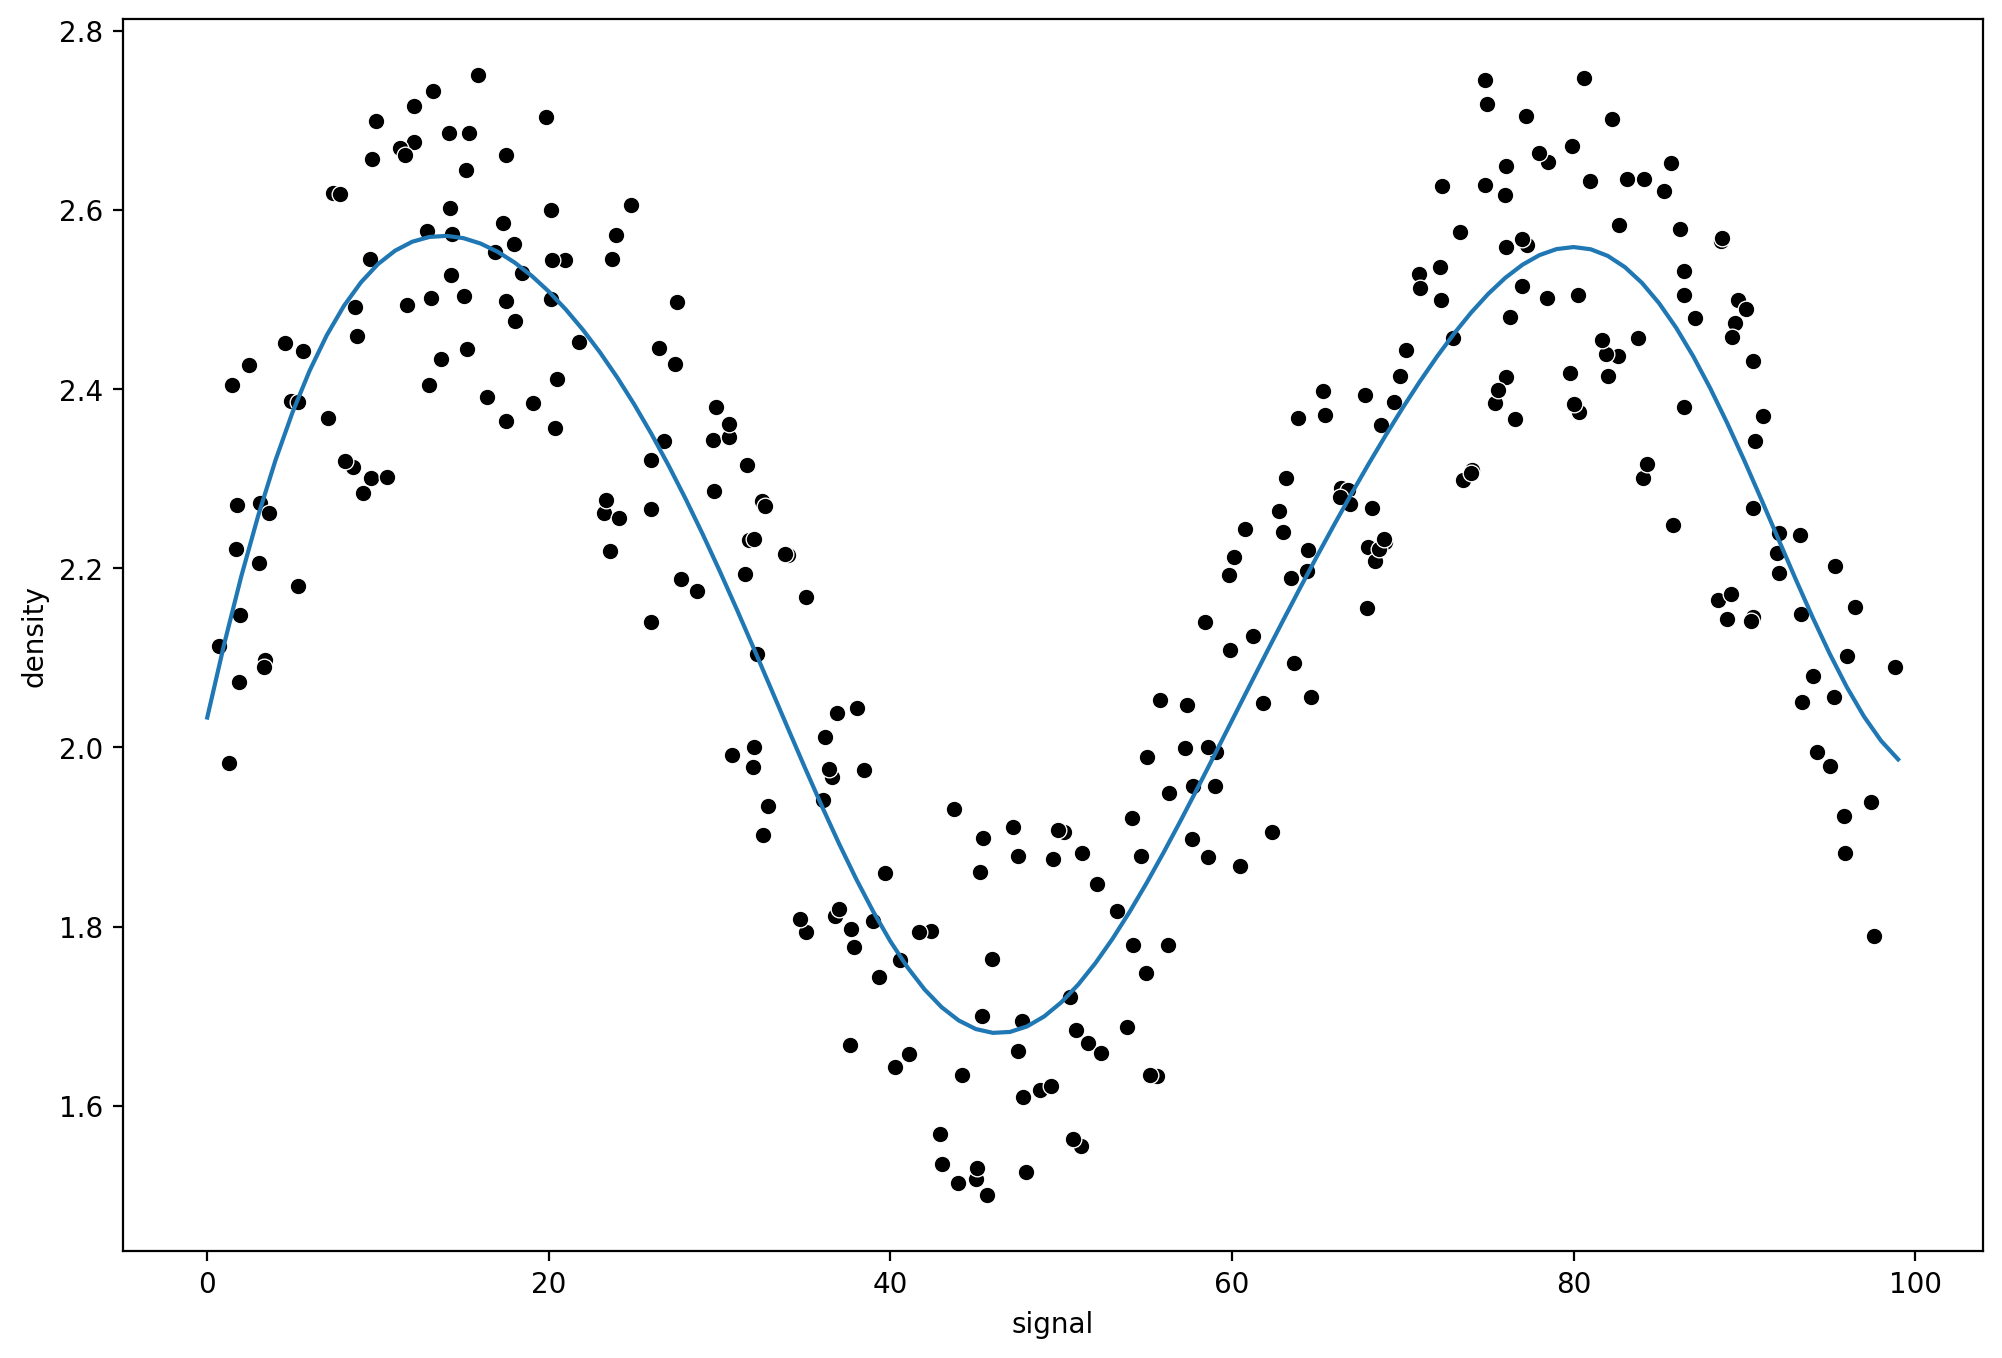

In [50]:
svr = SVR()
param_grid = {'C':[.01, .1, 1, 5, 10, 100],
             'gamma':['auto','scale']}

grid = GridSearchCV(svr, param_grid)
run_model(grid,X_train,y_train,X_test,y_test)

In [52]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(n_estimators=1)

RMSE: 0.18873477328461963
 MSE: 0.15299747409595904


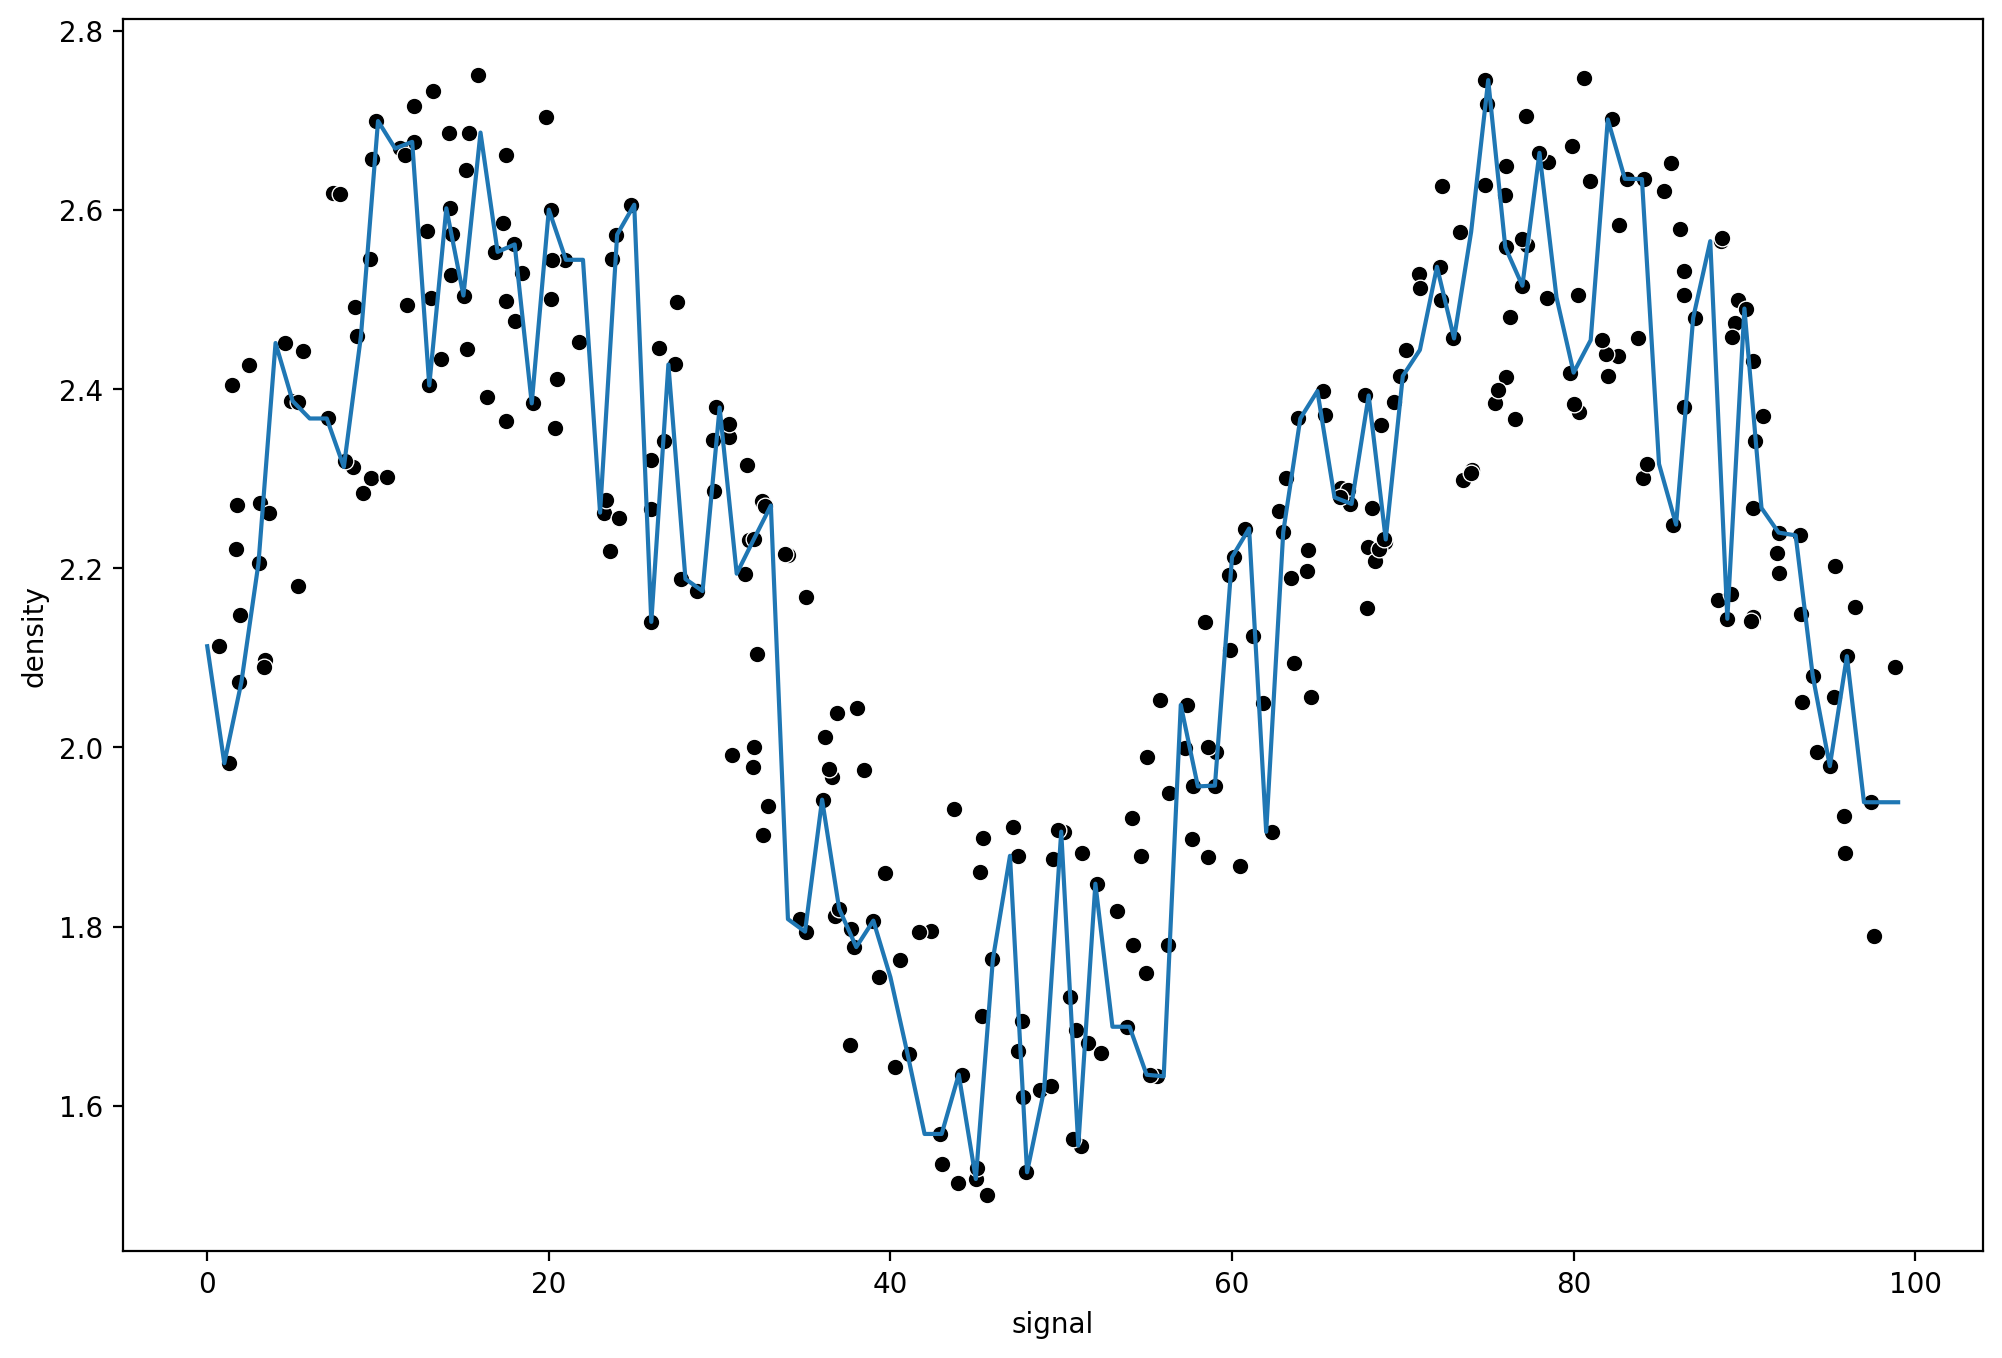

In [53]:
run_model(rfr,X_train,y_train,X_test,y_test)

In [55]:
from sklearn.ensemble import GradientBoostingRegressor, AdaBoostRegressor
model = GradientBoostingRegressor()

RMSE: 0.13294148649584667
 MSE: 0.11318284854800689


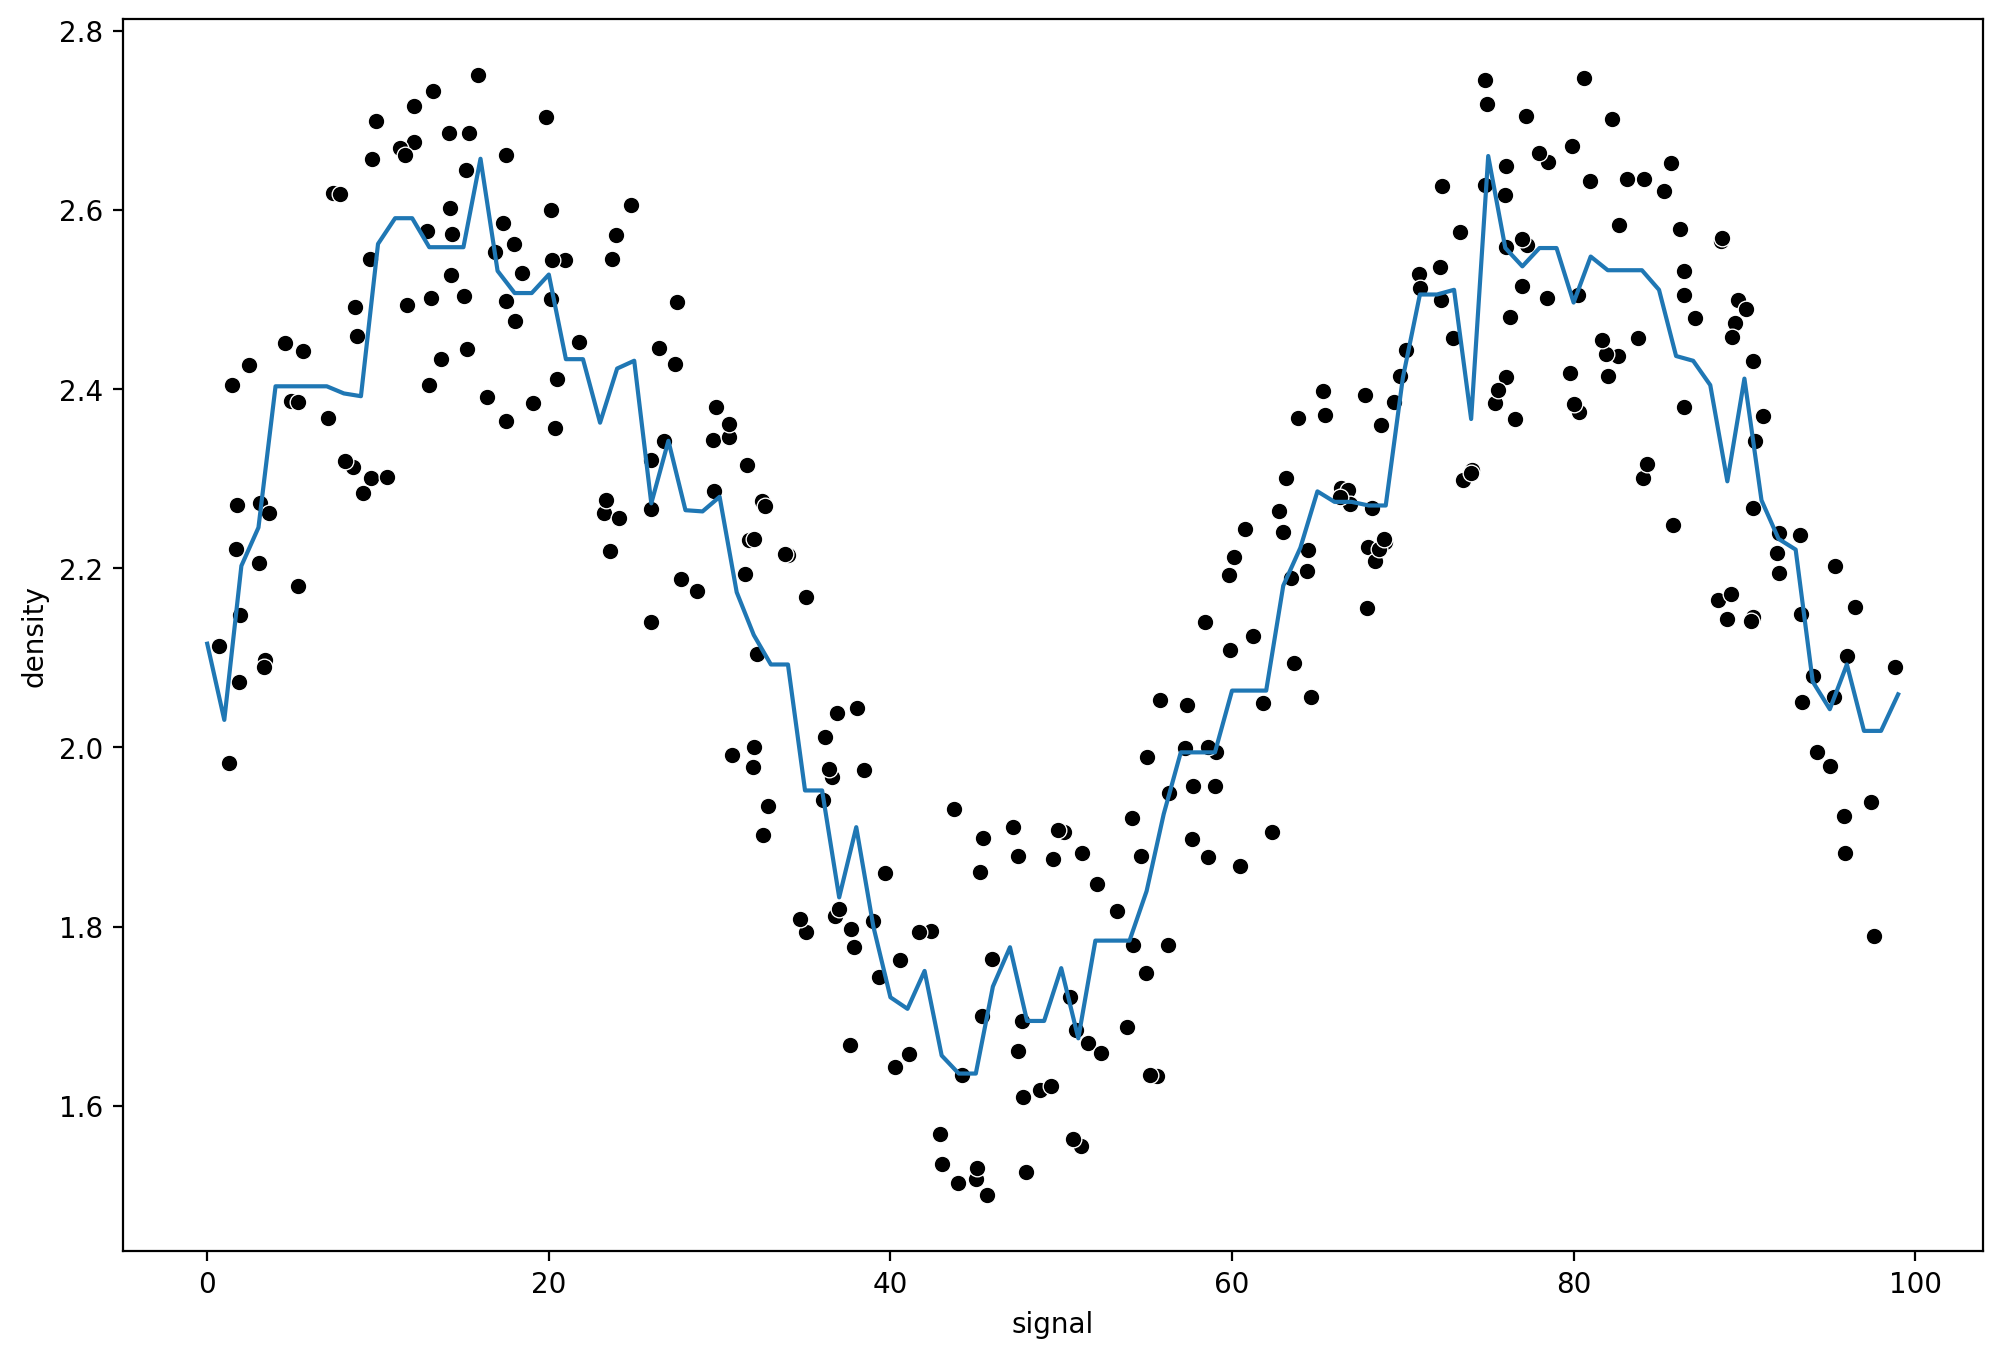

In [57]:
run_model(model,X_train,y_train,X_test,y_test)